# Data Mining Class Code: Week #1

### When a package is installed, we can "activate" it for use within Python using the 'import' command

In [1]:
# Load libraries
from sklearn import datasets

### The Boston Housing Dataset is a dataset from the 1970's that contains 506 observations on housing prices around the city of Boston.

In [2]:
# Load digits dataset
boston = datasets.load_boston()

# Create feature matrix
X = boston.data

# Create target vector
y = boston.target

### We can check the type of object we have stored in memory with the type() command:

In [3]:
type(X)

numpy.ndarray

In [4]:
type(y)

numpy.ndarray

### If we want to convert our array to a dataframe, we can import the package "pandas" to do this:

In [5]:
import pandas as pd
x_df = pd.DataFrame(X)

In [6]:
type(x_df)

pandas.core.frame.DataFrame

In [7]:
x_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
x_df.shape

(506, 13)

## PREPROCESSING STRUCTURED DATA

In [9]:
from sklearn import preprocessing

### First, we will create a simulated dataframe:

In [10]:
raw_data = {'patient': [1, 1, 1, 2, 2],
            'obs': [1, 2, 3, 1, 2],
            'treatment': [0, 1, 0, 1, 0],
            'score': ['strong', 'weak', 'normal', 'weak', 'strong']}
df = pd.DataFrame(raw_data, columns = ['patient', 'obs', 'treatment', 'score'])

In [11]:
df.head()

,patient,obs,treatment,score
0,1,1,0,strong
1,1,2,1,weak
2,1,3,0,normal
3,2,1,1,weak
4,2,2,0,strong


### How to: convert categorical data to numerical labels in a pandas dataframe:

In [12]:
# Create a label encoder
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()

In [13]:
# Fit the encoder to the pandas column
le.fit(df['score'])

LabelEncoder()

In [14]:
# View the labels (if you want)
list(le.classes_)

['normal', 'strong', 'weak']

In [15]:
le.classes_

array(['normal', 'strong', 'weak'], dtype=object)

In [16]:
# Apply the fitted encoder to the pandas column
le.transform(df['score']) 

array([1, 2, 0, 2, 1])

In [17]:
# Convert some integers into their category names
list(le.inverse_transform([0, 2, 1]))

['normal', 'weak', 'strong']

### How to: delete observations with missing values:

In [18]:
import numpy as np

In [19]:
# Suppose we have a matrix with the following features:
X = np.array([[1.1, 11.1], 
              [2.2, 22.2], 
              [3.3, 33.3], 
              [4.4, 44.4], 
              [np.nan, 55]])

In [20]:
# Remove observations with missing values
X[~np.isnan(X).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

### How to: Delete missing values:

In [21]:
# Create feature matrix
X = np.array([[1, 2], 
              [6, 3], 
              [8, 4], 
              [9, 5], 
              [np.nan, 4]])

#### How to delete missing values with numpy

In [22]:
# Remove observations with missing values
X[~np.isnan(X).any(axis=1)]

array([[1., 2.],
       [6., 3.],
       [8., 4.],
       [9., 5.]])

#### How to delete missing values with pandas

In [23]:
# Load data as a data frame
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])

# Remove observations with missing values
df.dropna()

,feature_1,feature_2
0,1.0,2.0
1,6.0,3.0
2,8.0,4.0
3,9.0,5.0


### How to: Impute missing values with means:

In [24]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [25]:
# Create an empty dataset
df = pd.DataFrame()

# Create two variables called x0 and x1. Make the first value of x1 a missing value
df['x0'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
df['x1'] = [np.nan,0.2654,0.2615,0.5846,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]

# View the dataset
df

,x0,x1
0,0.3051,NaN
1,0.4949,0.2654
2,0.6974,0.2615
3,0.3769,0.5846
4,0.2231,0.4615
5,0.3410,0.8308
6,0.4436,0.4962
7,0.5897,0.3269
8,0.6308,0.5346
9,0.5000,0.6731


In [26]:
# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Train the imputor on the df dataset
mean_imputer = mean_imputer.fit(df)

# Apply the imputer to the df dataset
imputed_df = mean_imputer.transform(df.values)

# View the data
imputed_df

array([[0.3051    , 0.49273333],
       [0.4949    , 0.2654    ],
       [0.6974    , 0.2615    ],
       [0.3769    , 0.5846    ],
       [0.2231    , 0.4615    ],
       [0.341     , 0.8308    ],
       [0.4436    , 0.4962    ],
       [0.5897    , 0.3269    ],
       [0.6308    , 0.5346    ],
       [0.5       , 0.6731    ]])

### How to: Impute missing class labels

In [27]:
# Load libraries
import numpy as np
from sklearn.impute import SimpleImputer

In [28]:
# Create feature matrix with categorical feature
X = np.array([[0, 2.10, 1.45], 
              [1, 1.18, 1.33], 
              [0, 1.22, 1.27],
              [0, -0.21, -1.19],
              [np.nan, 0.87, 1.31],
              [np.nan, -0.67, -0.22]])

In [29]:
#Fill missing values class with most frequent class:
# Create Imputer object
imputer = SimpleImputer(strategy='most_frequent')

# Fill missing values with most frequent class
imputer.fit_transform(X)

array([[ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 0.  , -0.21, -1.19],
       [ 0.  ,  0.87,  1.31],
       [ 0.  , -0.67, -0.22]])

### How to: Calculate difference between dates and times:

In [30]:
# Create data frame
df = pd.DataFrame()

# Create two datetime features
df['Arrived'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-04-2017')]
df['Left'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-06-2017')]

In [31]:
# Calculate duration between features
df['Left'] - df['Arrived']

0   0 days
1   2 days
dtype: timedelta64[ns]

In [32]:
#To strip 'days' from the field:
df['days'] = df['Left'] - df['Arrived']
df['days'] = df['days'].dt.days
df.head()

,Arrived,Left,days
0,2017-01-01,2017-01-01,0
1,2017-01-04,2017-01-06,2


### How to: Rescale a continuous feature using minmax scaling:

In [33]:
from sklearn import preprocessing
import numpy as np

In [34]:
# Create feature
x = np.array([[-500.5], 
              [-100.1], 
              [0], 
              [100.1], 
              [900.9]])

In [35]:
# Create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Scale feature
x_scale = minmax_scale.fit_transform(x)

# Show feature
x_scale

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

### How to: standardize a feature:

In [36]:
# Load libraries
from sklearn import preprocessing
import numpy as np

In [37]:
# Create feature
x = np.array([[-500.5], 
              [-100.1], 
              [0], 
              [100.1], 
              [900.9]])

In [38]:
# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
standardized = scaler.fit_transform(x)

# Show feature
standardized

array([[-1.26687088],
       [-0.39316683],
       [-0.17474081],
       [ 0.0436852 ],
       [ 1.79109332]])

## DATA WRANGLING

### How to: Assign a new column to a pandas dataframe:

In [39]:
# Create empty dataframe
df = pd.DataFrame()

# Create a column
df['name'] = ['John', 'Steve', 'Sarah']

# View dataframe
df

,name
0,John
1,Steve
2,Sarah


In [40]:
# Assign a new column to df called 'age' with a list of ages
df.assign(age = [31, 32, 19])

,name,age
0,John,31
1,Steve,32
2,Sarah,19


### How to: Convert a categorical variable into dummy variables:

In [41]:
# Create a dataframe
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
            'sex': ['male', 'female', 'male', 'female', 'female']}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'sex'])
df

,first_name,last_name,sex
0,Jason,Miller,male
1,Molly,Jacobson,female
2,Tina,Ali,male
3,Jake,Milner,female
4,Amy,Cooze,female


In [42]:
# Create a set of dummy variables from the sex variable
df_sex = pd.get_dummies(df['sex'])
df_sex

,female,male
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [43]:
# Join the dummy variables to the main dataframe
df_new = pd.concat([df, df_sex], axis=1)
df_new

,first_name,last_name,sex,female,male
0,Jason,Miller,male,0,1
1,Molly,Jacobson,female,1,0
2,Tina,Ali,male,0,1
3,Jake,Milner,female,1,0
4,Amy,Cooze,female,1,0


### How to: Convert a string categorical variable to a numeric variable:

In [44]:
raw_data = {'patient': [1, 1, 1, 2, 2], 
            'obs': [1, 2, 3, 1, 2], 
            'treatment': [0, 1, 0, 1, 0],
            'score': ['strong', 'weak', 'normal', 'weak', 'strong']} 
df = pd.DataFrame(raw_data, columns = ['patient', 'obs', 'treatment', 'score'])
df

,patient,obs,treatment,score
0,1,1,0,strong
1,1,2,1,weak
2,1,3,0,normal
3,2,1,1,weak
4,2,2,0,strong


In [45]:
def score_to_numeric(x):
    if x=='strong':
        return 3
    if x=='normal':
        return 2
    if x=='weak':
        return 1

In [46]:
df['score_num'] = df['score'].apply(score_to_numeric)
df

,patient,obs,treatment,score,score_num
0,1,1,0,strong,3
1,1,2,1,weak,1
2,1,3,0,normal,2
3,2,1,1,weak,1
4,2,2,0,strong,3


### How to: Create a column based on a conditional in numpy:

In [47]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'age': [42, 52, 36, 24, 73], 
        'preTestScore': [4, 24, 31, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, columns = ['name', 'age', 'preTestScore', 'postTestScore'])
df

,name,age,preTestScore,postTestScore
0,Jason,42,4,25
1,Molly,52,24,94
2,Tina,36,31,57
3,Jake,24,2,62
4,Amy,73,3,70


In [48]:
# Create a new column called df.elderly where the value is yes
# if df.age is greater than 50 and no if not
df['elderly'] = np.where(df['age']>=50, 'yes', 'no')
df

,name,age,preTestScore,postTestScore,elderly
0,Jason,42,4,25,no
1,Molly,52,24,94,yes
2,Tina,36,31,57,no
3,Jake,24,2,62,no
4,Amy,73,3,70,yes


### How to: Delete duplicates in pandas:

In [49]:
raw_data = {'first_name': ['Jason', 'Jason', 'Jason','Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Miller', 'Miller','Ali', 'Milner', 'Cooze'], 
            'age': [42, 42, 1111111, 36, 24, 73], 
            'preTestScore': [4, 4, 4, 31, 2, 3],
            'postTestScore': [25, 25, 25, 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Jason,Miller,42,4,25
2,Jason,Miller,1111111,4,25
3,Tina,Ali,36,31,57
4,Jake,Milner,24,2,62
5,Amy,Cooze,73,3,70


In [50]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

In [51]:
df.drop_duplicates()

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
2,Jason,Miller,1111111,4,25
3,Tina,Ali,36,31,57
4,Jake,Milner,24,2,62
5,Amy,Cooze,73,3,70


### How to: Filter pandas dataframes:

In [52]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df

,name,year,reports,coverage
Cochice,Jason,2012,4,25
Pima,Molly,2012,24,94
Santa Cruz,Tina,2013,31,57
Maricopa,Jake,2014,2,62
Yuma,Amy,2014,3,70


In [53]:
#To view one column:
df['name']

Cochice       Jason
Pima          Molly
Santa Cruz     Tina
Maricopa       Jake
Yuma            Amy
Name: name, dtype: object

In [54]:
df[['name']]

,name
Cochice,Jason
Pima,Molly
Santa Cruz,Tina
Maricopa,Jake
Yuma,Amy


In [55]:
#To view two columns:
df[['name', 'reports']]

,name,reports
Cochice,Jason,4
Pima,Molly,24
Santa Cruz,Tina,31
Maricopa,Jake,2
Yuma,Amy,3


In [56]:
#To view the first 2 rows:
df[:2]

,name,year,reports,coverage
Cochice,Jason,2012,4,25
Pima,Molly,2012,24,94


In [57]:
#To view rows where coverage is > 50
df[df['coverage'] > 50]

,name,year,reports,coverage
Pima,Molly,2012,24,94
Santa Cruz,Tina,2013,31,57
Maricopa,Jake,2014,2,62
Yuma,Amy,2014,3,70


In [58]:
# To view rows where coverage is > 50 and reports < 4
df[(df['coverage']  > 50) & (df['reports'] < 4)]

,name,year,reports,coverage
Maricopa,Jake,2014,2,62
Yuma,Amy,2014,3,70


### How to: Load a .CSV file into pandas:

In [59]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'], 
            'age': [42, 52, 36, 24, 73], 
            'preTestScore': [4, 24, 31, ".", "."],
            'postTestScore': ["25,000", "94,000", 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df


,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


In [60]:
#Export data to .csv
df.to_csv('example.csv')

In [61]:
import os
os.getcwd()

'C:\\Users\\roger\\OneDrive\\Python\\Courses\\DataMiningCourse'

In [62]:
#Import created .csv
dfloaded = pd.read_csv('example.csv')
dfloaded

,Unnamed: 0,first_name,last_name,age,preTestScore,postTestScore
0,0,Jason,Miller,42,4,"25,000"
1,1,Molly,Jacobson,52,24,"94,000"
2,2,Tina,.,36,31,57
3,3,Jake,Milner,24,.,62
4,4,Amy,Cooze,73,.,70


### How to: Load an excel file into pandas:

In [63]:
# Create URL to Excel file (alternatively this can be a filepath)
url = 'https://raw.githubusercontent.com/RogerCui-GitHub/machine-learning/master/Data_Mining/datasets/data_week1.xlsx'

# Load the first sheet of the Excel file into a data frame
df = pd.read_excel(url, sheename=0, header=1)

# View the first ten rows
df.head(10)

,5,2015-01-01 00:00:00,0
0,5,2015-01-01 00:00:01,0
1,9,2015-01-01 00:00:02,0
2,6,2015-01-01 00:00:03,0
3,6,2015-01-01 00:00:04,0
4,9,2015-01-01 00:00:05,0
5,7,2015-01-01 00:00:06,0
6,1,2015-01-01 00:00:07,0
7,6,2015-01-01 00:00:08,0
8,9,2015-01-01 00:00:09,0
9,5,2015-01-01 00:00:10,0


### How to: Sort rows in pandas:

In [64]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [1, 2, 1, 2, 3],
        'coverage': [2, 2, 3, 3, 3]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df

,name,year,reports,coverage
Cochice,Jason,2012,1,2
Pima,Molly,2012,2,2
Santa Cruz,Tina,2013,1,3
Maricopa,Jake,2014,2,3
Yuma,Amy,2014,3,3


In [65]:
df.sort_values(by='reports', ascending=0)

,name,year,reports,coverage
Yuma,Amy,2014,3,3
Pima,Molly,2012,2,2
Maricopa,Jake,2014,2,3
Cochice,Jason,2012,1,2
Santa Cruz,Tina,2013,1,3


In [66]:
df.sort_values(by=['coverage', 'reports'])

,name,year,reports,coverage
Cochice,Jason,2012,1,2
Pima,Molly,2012,2,2
Santa Cruz,Tina,2013,1,3
Maricopa,Jake,2014,2,3
Yuma,Amy,2014,3,3


## DATA VISUALIZATION

### How to: Visualize data with seaborn package:

In [67]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.DataFrame()

df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)

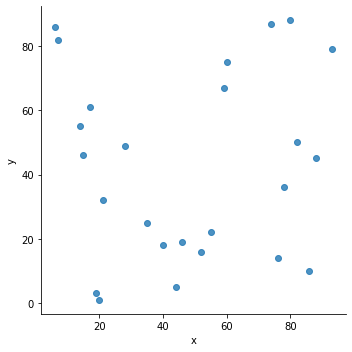

In [69]:
#Scatterplot
sns.lmplot('x', 'y', data=df, fit_reg=False)

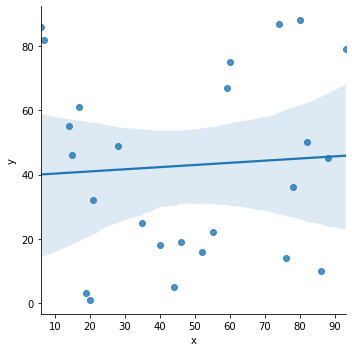

In [70]:
#Scatterplot
sns.lmplot('x', 'y', data=df, fit_reg=True)

<AxesSubplot:>

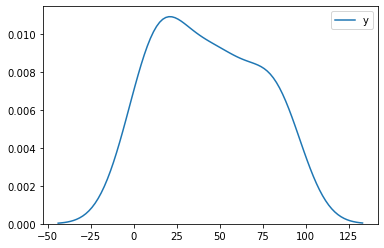

In [71]:
#Density plot
sns.kdeplot(df.y)

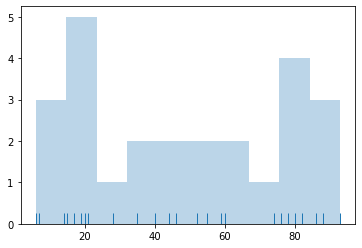

In [72]:
#Histogram:
plt.hist(df.x, alpha=.3)
sns.rugplot(df.x);

<AxesSubplot:>

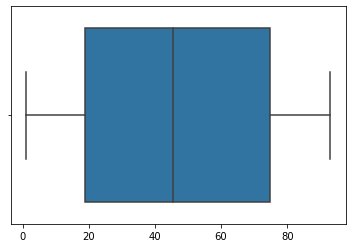

In [73]:
#Boxplot
sns.boxplot([df.y, df.x])

### How to: Visualize data with matplotlip package:

In [74]:
#Back-to-back barplot
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

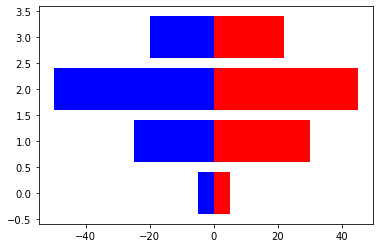

In [75]:
#Back-to-back barplot
import numpy as np
import matplotlib.pyplot as plt

women_pop = np.array([5., 30., 45., 22.])
men_pop     = np.array( [5., 25., 50., 20.])
X = np.arange(4)

plt.barh(X, women_pop, color = 'r')
plt.barh(X, -men_pop, color = 'b')
plt.show()

In [76]:
#Barplot
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])
df

,first_name,pre_score,mid_score,post_score
0,Jason,4,25,5
1,Molly,24,94,43
2,Tina,31,57,23
3,Jake,2,62,23
4,Amy,3,70,51


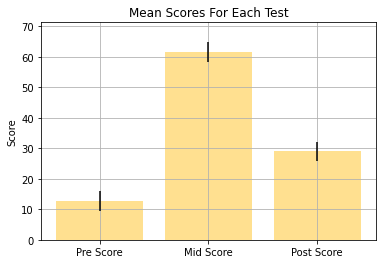

In [77]:
# Create a list of the mean scores for each variable
mean_values = [df['pre_score'].mean(), df['mid_score'].mean(), df['post_score'].mean()]

# Create a list of variances, which are set at .25 above and below the score
variance = [df['pre_score'].mean() * 0.25, df['pre_score'].mean() * 0.25, df['pre_score'].mean() * 0.25]

# Set the bar labels
bar_labels = ['Pre Score', 'Mid Score', 'Post Score']

# Create the x position of the bars
x_pos = list(range(len(bar_labels)))

# Create the plot bars
# In x position
plt.bar(x_pos,
        # using the data from the mean_values
        mean_values, 
        # with a y-error lines set at variance
        yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='#FFC222',
        # alpha 0.5
        alpha=0.5)

# add a grid
plt.grid()

# set height of the y-axis
max_y = max(zip(mean_values, variance)) # returns a tuple, here: (3, 5)
plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

# set axes labels and title
plt.ylabel('Score')
plt.xticks(x_pos, bar_labels)
plt.title('Mean Scores For Each Test')

plt.show()

In [78]:
#Group bar plot
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])
df

,first_name,pre_score,mid_score,post_score
0,Jason,4,25,5
1,Molly,24,94,43
2,Tina,31,57,23
3,Jake,2,62,23
4,Amy,3,70,51


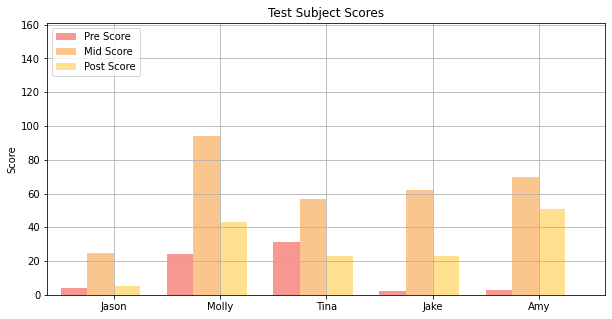

In [79]:
# Setting the positions and width for the bars
pos = list(range(len(df['pre_score']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['pre_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['first_name'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['mid_score'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['first_name'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df['post_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=df['first_name'][2]) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['first_name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['Pre Score', 'Mid Score', 'Post Score'], loc='upper left')
plt.grid()
plt.show()

(array([4.0000e+00, 1.2000e+01, 5.0000e+01, 1.9100e+02, 6.3700e+02,
        1.9860e+03, 4.4340e+03, 8.5250e+03, 1.3245e+04, 1.6562e+04,
        1.7481e+04, 1.5024e+04, 1.0835e+04, 6.3850e+03, 2.9560e+03,
        1.1400e+03, 4.0800e+02, 1.0500e+02, 1.6000e+01, 4.0000e+00]),
 array([0.06369406, 0.54500339, 1.02631272, 1.50762206, 1.98893139,
        2.47024073, 2.95155006, 3.43285939, 3.91416873, 4.39547806,
        4.8767874 , 5.35809673, 5.83940606, 6.3207154 , 6.80202473,
        7.28333407, 7.7646434 , 8.24595273, 8.72726207, 9.2085714 ,
        9.68988074]),
 <BarContainer object of 20 artists>)

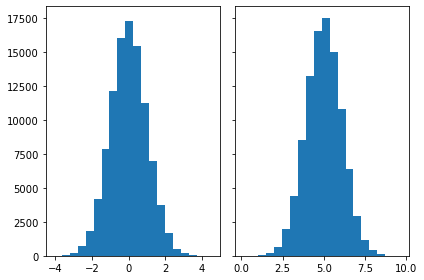

In [80]:
#Histogram
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

In [81]:
#Scatterplot
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
        'female': [0, 1, 1, 0, 1],
        'age': [42, 52, 36, 24, 73], 
        'preTestScore': [4, 24, 31, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'female', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,female,preTestScore,postTestScore
0,Jason,Miller,42,0,4,25
1,Molly,Jacobson,52,1,24,94
2,Tina,Ali,36,1,31,57
3,Jake,Milner,24,0,2,62
4,Amy,Cooze,73,1,3,70


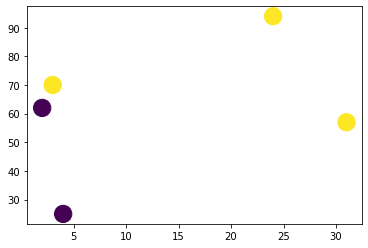

In [82]:
plt.scatter(df.preTestScore, df.postTestScore, s=300, c=df.female)

In [83]:
#Stacked Percentage Barplot
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])
df

,first_name,pre_score,mid_score,post_score
0,Jason,4,25,5
1,Molly,24,94,43
2,Tina,31,57,23
3,Jake,2,62,23
4,Amy,3,70,51


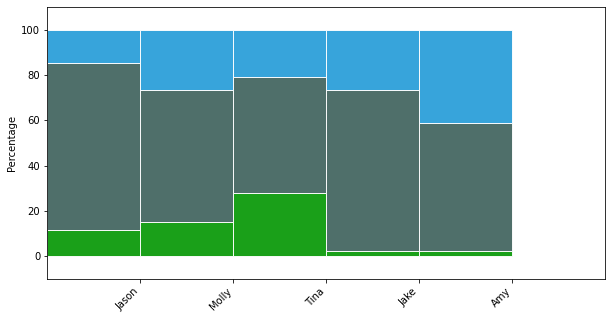

In [84]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['pre_score']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k for i,j,k in zip(df['pre_score'], df['mid_score'], df['post_score'])]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(df['pre_score'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(df['mid_score'], totals)]

# Create the percentage of the total score the post_score value for each participant was
post_rel = [i / j * 100 for  i,j in zip(df['post_score'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Pre Score', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#019600',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Mid Score', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#3C5F5A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       post_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(pre_rel, mid_rel)], 
       # labeled 
       label='Post Score',
       # with alpha
       alpha=0.9, 
       # with color
       color='#219AD8', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['first_name'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

In [85]:
#Pie chart
raw_data = {'officer_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'jan_arrests': [4, 24, 31, 2, 3],
        'feb_arrests': [25, 94, 57, 62, 70],
        'march_arrests': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['officer_name', 'jan_arrests', 'feb_arrests', 'march_arrests'])
df

,officer_name,jan_arrests,feb_arrests,march_arrests
0,Jason,4,25,5
1,Molly,24,94,43
2,Tina,31,57,23
3,Jake,2,62,23
4,Amy,3,70,51


In [86]:
# Create a column with the total arrests for each officer
df['total_arrests'] = df['jan_arrests'] + df['feb_arrests'] + df['march_arrests']
df

,officer_name,jan_arrests,feb_arrests,march_arrests,total_arrests
0,Jason,4,25,5,34
1,Molly,24,94,43,161
2,Tina,31,57,23,111
3,Jake,2,62,23,87
4,Amy,3,70,51,124


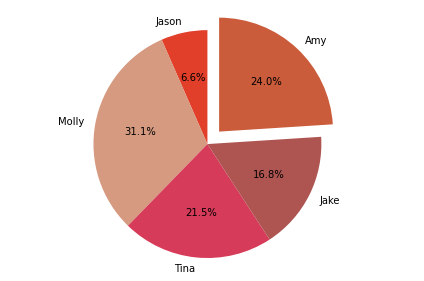

In [87]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    df['total_arrests'],
    # with the labels being officer names
    labels=df['officer_name'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

## Joining data

### Inner join

In [88]:
import pandas as pd
from IPython.display import display
from IPython.display import Image

In [89]:
raw_data = {
            'subject_id': ['1', '2', '3', '4', '5'],
            'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
            'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [90]:
raw_data = {
            'subject_id': ['4', '5', '6', '7', '8'],
            'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
            'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [91]:
raw_data = {
            'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
            'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])
df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [92]:
df_inner = pd.merge(df_a, df_b, on='subject_id', how='inner')
df_inner

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


### Left outer join

In [93]:
df_loj = pd.merge(df_a, df_b, on='subject_id', how='left')
df_loj

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


### Full outer join

In [94]:
df_foj = pd.merge(df_a, df_b, on='subject_id', how='outer')
df_foj

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan
